<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sat Jul  5 12:26:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.153.02             Driver Version: 570.153.02     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    Off |   00000000:01:00.0 Off |                  N/A |
| N/A   49C    P8              9W /   35W |      80MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.5.1+cu124
cuda


## 1. What are 3 areas in industry where computer vision is currently being used?

In [3]:
# health
# robotics
# vehicles

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

In [4]:
# overfitting is a situation that a machine learning model fits too well to the training data and performs bad (low accuracy) on the test data

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [5]:
# feature selection
# use more/less complex models
# feature engineering
# oversampling
# dimensionality resuction
# cross val
# early stopping

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

In [6]:
# done

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [7]:
import torchvision
from torchvision import transforms

train = torchvision.datasets.MNIST(
    root="../CV_Practice/train", # where to download data to?
    train=True, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the target
)

test = torchvision.datasets.MNIST(
    root="../CV_Practice/test", # where to download data to?
    train=False, # do we want the training dataset?
    download=True, # do we want to download yes/no?
    transform=transforms.ToTensor(), # how do we want to transform the data?
    target_transform=None # how do we want to transform the target
)

In [8]:
len(train)

60000

In [9]:
len(test)

10000

## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [10]:
class_names = train.classes
train_idx = train.class_to_idx

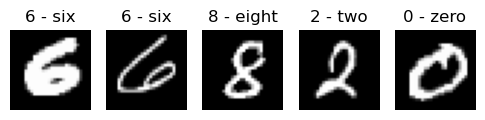

In [11]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

fig = plt.figure(figsize=(6, 6))
rows, cols = 5, 1

for i in range(1, rows*cols+1):
    random_idx = torch.randint(0, len(train), size=[1]).item()
    # print(random_idx)
    img, label = train[random_idx]
    fig.add_subplot(cols, rows, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
train, test

(Dataset MNIST
     Number of datapoints: 60000
     Root location: ../CV_Practice/train
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset MNIST
     Number of datapoints: 10000
     Root location: ../CV_Practice/test
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [13]:
BATCH_SIZE = 32

from torch.utils.data import DataLoader

train_loader = DataLoader(dataset=train, batch_size=BATCH_SIZE, shuffle=True)

test_loader = DataLoader(dataset=test, batch_size=BATCH_SIZE, shuffle=False)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
from torch import nn

class MNISTModel(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model = MNISTModel(input_shape=1,
    hidden_units=10,
    output_shape=len(class_names)).to(device)
model

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
from PyTorchLearnings_UDEMY.Python.helper_functions import accuracy_fn

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
loss_fn = nn.CrossEntropyLoss()

In [16]:
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device=None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"\nTrain time on {device}: {total_time:.3f} seconds")
    return total_time

In [17]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

### on cpu

In [18]:
torch.manual_seed(42)

# meassure the time
from tqdm.auto import tqdm
from timeit import default_timer as timer
train_time_start_on_cpu = timer()

# set epochs
epochs = 5

# create an optimizaton and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n---------")
    train_step(model=model,
               data_loader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    print(f"Epoch {epoch}\n---------")
    test_step(model = model,
              data_loader=test_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_cpu = timer()

total_train_time_model_on_cpu = print_train_time(start=train_time_start_on_cpu, end=train_time_end_on_cpu, device="cpu")

/home/diyrad167/.conda/envs/test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
---------
Train loss: 0.29028 | Train accuracy: 90.41%
Epoch 0
---------


 20%|██        | 1/5 [00:08<00:32,  8.10s/it]

Test loss: 0.07027 | Test accuracy: 97.91%

Epoch 1
---------
Train loss: 0.07982 | Train accuracy: 97.49%
Epoch 1
---------


 40%|████      | 2/5 [00:15<00:23,  7.75s/it]

Test loss: 0.05719 | Test accuracy: 98.04%

Epoch 2
---------
Train loss: 0.05976 | Train accuracy: 98.11%
Epoch 2
---------


 60%|██████    | 3/5 [00:23<00:15,  7.61s/it]

Test loss: 0.06031 | Test accuracy: 98.01%

Epoch 3
---------
Train loss: 0.04979 | Train accuracy: 98.41%
Epoch 3
---------


 80%|████████  | 4/5 [00:30<00:07,  7.59s/it]

Test loss: 0.04907 | Test accuracy: 98.36%

Epoch 4
---------
Train loss: 0.04466 | Train accuracy: 98.58%
Epoch 4
---------


100%|██████████| 5/5 [00:38<00:00,  7.62s/it]

Test loss: 0.05046 | Test accuracy: 98.34%


Train time on cpu: 38.116 seconds


### on gpu

In [19]:
train_time_start_on_gpu = timer()

# set epochs
epochs = 5

# create an optimizaton and eval loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n---------")
    train_step(model=model,
               data_loader=train_loader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

    print(f"Epoch {epoch}\n---------")
    test_step(model = model,
              data_loader=test_loader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()

total_train_time_model_on_gpu = print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
---------
Train loss: 0.03959 | Train accuracy: 98.78%
Epoch 0
---------


 20%|██        | 1/5 [00:07<00:30,  7.53s/it]

Test loss: 0.04286 | Test accuracy: 98.62%

Epoch 1
---------
Train loss: 0.03670 | Train accuracy: 98.88%
Epoch 1
---------


 40%|████      | 2/5 [00:15<00:22,  7.51s/it]

Test loss: 0.04074 | Test accuracy: 98.64%

Epoch 2
---------
Train loss: 0.03411 | Train accuracy: 98.88%
Epoch 2
---------


 60%|██████    | 3/5 [00:22<00:14,  7.43s/it]

Test loss: 0.05084 | Test accuracy: 98.42%

Epoch 3
---------
Train loss: 0.03172 | Train accuracy: 98.99%
Epoch 3
---------


 80%|████████  | 4/5 [00:29<00:07,  7.44s/it]

Test loss: 0.03819 | Test accuracy: 98.63%

Epoch 4
---------
Train loss: 0.02857 | Train accuracy: 99.09%
Epoch 4
---------


100%|██████████| 5/5 [00:37<00:00,  7.44s/it]

Test loss: 0.04372 | Test accuracy: 98.69%


Train time on cuda: 37.199 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [20]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    """
    Returns a dictionary containing the results of model predicting on data_loader
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # make predictions
            X, y = X.to(device), y.to(device)
            y_pred = model(X)

            # Accumulate the loss and acc values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # scale loss and acc to find the avg loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model name ": model.__class__.__name__, # Only works when model was created with a class
            "model loss ": loss.item(),
            "model acc ": acc
            }

In [21]:
model_results = eval_model(
    model=model,
    data_loader=test_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
    # device=device
)

100%|██████████| 313/313 [00:00<00:00, 379.16it/s]


In [22]:
model_results

{'model name ': 'MNISTModel',
 'model loss ': 0.04372148588299751,
 'model acc ': 98.69209265175719}

In [23]:
import random
random.seed(42)
test_samples=[]
test_labels=[]
for sample, label in random.sample(list(test), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [24]:
test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, '2 - two')

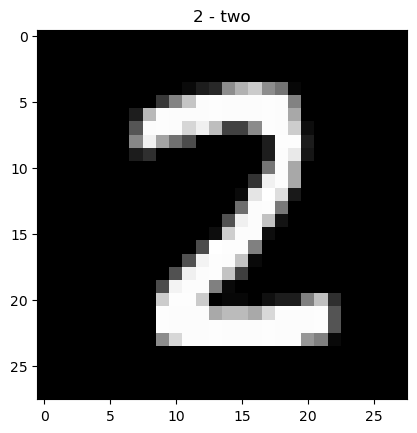

In [25]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [26]:
def make_predictions(model:torch.nn.Module,
                   data:list,
                   device:torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # forward pass (model outputs raw logits)
            pred_logit = model(sample)

            # get pred probs (logits -> pred probs)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # get pred prob off the GPU for further calc
            pred_probs.append(pred_prob.cpu())
    #stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [27]:
# make predictions
pred_probs = make_predictions(model=model,
                              data=test_samples)

# view first two pred prob
pred_probs[:2]

tensor([[2.2221e-11, 1.0978e-07, 1.0000e+00, 1.3673e-06, 3.9091e-15, 2.9083e-15,
         2.3676e-15, 1.5522e-07, 4.4064e-07, 1.4992e-12],
        [1.4046e-08, 9.9572e-01, 2.1657e-05, 2.3297e-07, 5.5351e-05, 1.2622e-04,
         1.6511e-03, 3.4867e-05, 1.2431e-03, 1.1521e-03]])

In [28]:
# convert prediction prob to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

In [29]:
test_labels, pred_classes

([2, 1, 2, 4, 6, 6, 4, 9, 1], tensor([2, 1, 2, 4, 6, 6, 4, 9, 1]))

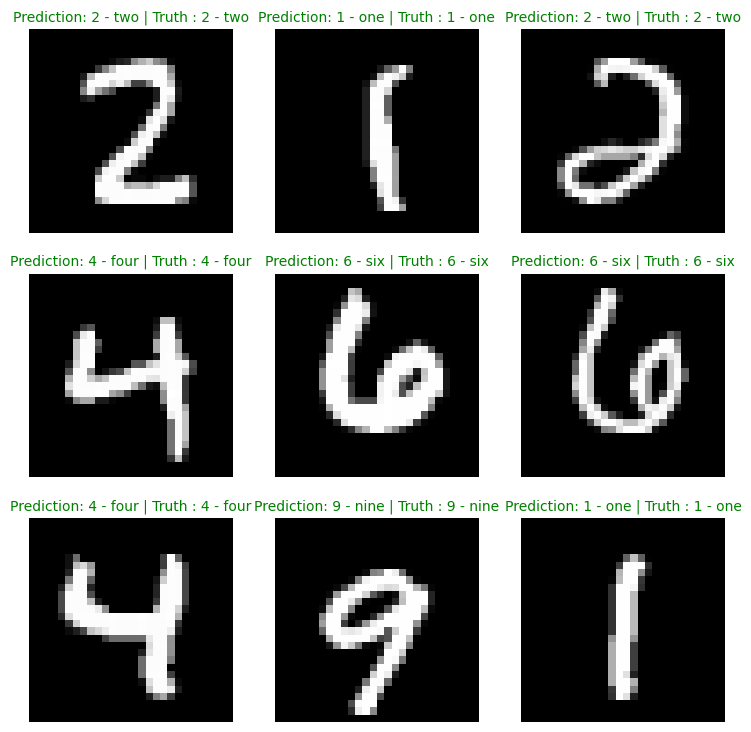

In [30]:
# plot pred
plt.figure(figsize=(9,9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows, ncols, i + 1)

    # plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # find the pred (in text form)
    pred_label = class_names[pred_classes[i]]

    # get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # create a title for the plot
    title_text =f"Prediction: {pred_label} | Truth : {truth_label}"

    # check for quality between pred and truth and change color of title text
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if pred = truth
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis('off')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [31]:
from torchmetrics import ConfusionMatrix
import mlxtend
from mlxtend.plotting import plot_confusion_matrix

In [45]:
y_preds=[]
model.eval()
with torch.inference_mode():
  for batch, (X, y) in tqdm(enumerate(test_loader), desc="Makin preds"): ##
    # Make sure data on right device
    X, y = X.to(device), y.to(device)
    # Forward pass
    y_pred_logits = model(X)
    # Logits -> Pred probs -> Pred label
    y_pred_labels = torch.argmax(y_pred_logits, dim=1)
    # Append the labels to the preds list
    y_preds.append(y_pred_labels)
  y_preds=torch.cat(y_preds).cpu()
y_pred_tensor[:10]

Makin preds: 313it [00:00, 367.10it/s]


tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [46]:
test.targets[:10], y_preds[:10]

(tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]),
 tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9]))

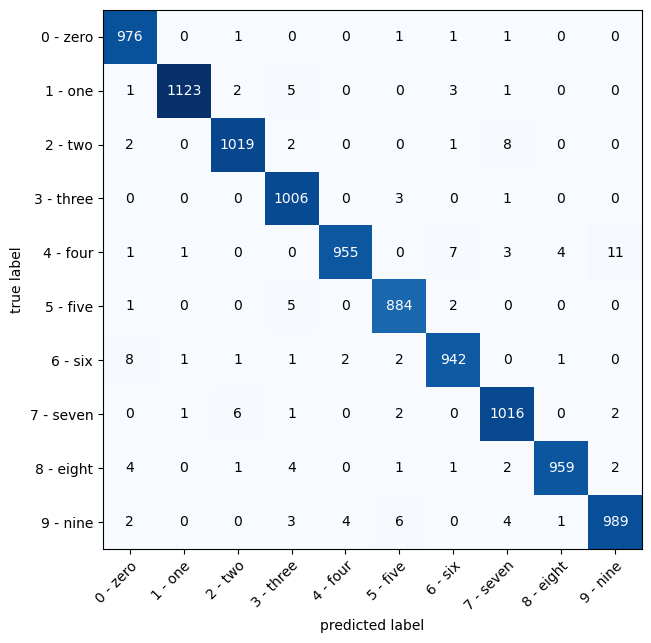

In [47]:
# 2. setup confussion instance and compare predictions to targets
confmat = ConfusionMatrix(task="multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=test.targets)

# 3. plot the confussion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [48]:
kerandoman_tensor = torch.randn([1, 3, 64, 64])
kerandoman_tensor

tensor([[[[-1.3407, -0.5854,  0.5362,  ...,  0.6368,  0.2176, -0.0467],
          [ 1.6192,  1.4506,  0.2695,  ...,  0.4598,  0.2618, -0.7599],
          [-0.4949, -0.5923,  0.1543,  ...,  0.0179, -1.4129, -1.8791],
          ...,
          [-0.8283, -0.3439, -0.7324,  ..., -0.3857,  1.3663, -1.4047],
          [-1.3283, -1.2493, -0.1002,  ..., -0.2429,  0.8781, -0.3691],
          [ 0.3143, -1.0053, -1.3435,  ..., -0.6343,  0.5639, -0.2297]],

         [[ 0.9753,  1.9774, -1.2741,  ...,  0.4083, -1.5780,  0.7804],
          [ 0.8971, -1.1392, -1.3100,  ..., -0.1495,  1.1932, -0.8364],
          [ 0.9811, -0.5399, -0.4206,  ..., -0.1027,  0.5707,  0.5692],
          ...,
          [-0.4152, -0.5613, -1.5220,  ..., -2.0355,  0.8406, -1.2986],
          [-0.6696, -0.0830,  0.0692,  ...,  0.8036, -1.4121,  0.1979],
          [-0.9858, -0.6834, -0.3269,  ..., -0.9968, -0.4342,  1.0244]],

         [[-1.7776,  0.0298,  0.3639,  ..., -0.8086, -0.7178,  0.4815],
          [ 0.8880, -1.5327, -

In [49]:
kerandoman_tensor.shape

torch.Size([1, 3, 64, 64])

In [50]:
kerandoman_tensor[0]

tensor([[[-1.3407, -0.5854,  0.5362,  ...,  0.6368,  0.2176, -0.0467],
         [ 1.6192,  1.4506,  0.2695,  ...,  0.4598,  0.2618, -0.7599],
         [-0.4949, -0.5923,  0.1543,  ...,  0.0179, -1.4129, -1.8791],
         ...,
         [-0.8283, -0.3439, -0.7324,  ..., -0.3857,  1.3663, -1.4047],
         [-1.3283, -1.2493, -0.1002,  ..., -0.2429,  0.8781, -0.3691],
         [ 0.3143, -1.0053, -1.3435,  ..., -0.6343,  0.5639, -0.2297]],

        [[ 0.9753,  1.9774, -1.2741,  ...,  0.4083, -1.5780,  0.7804],
         [ 0.8971, -1.1392, -1.3100,  ..., -0.1495,  1.1932, -0.8364],
         [ 0.9811, -0.5399, -0.4206,  ..., -0.1027,  0.5707,  0.5692],
         ...,
         [-0.4152, -0.5613, -1.5220,  ..., -2.0355,  0.8406, -1.2986],
         [-0.6696, -0.0830,  0.0692,  ...,  0.8036, -1.4121,  0.1979],
         [-0.9858, -0.6834, -0.3269,  ..., -0.9968, -0.4342,  1.0244]],

        [[-1.7776,  0.0298,  0.3639,  ..., -0.8086, -0.7178,  0.4815],
         [ 0.8880, -1.5327, -0.4972,  ..., -0

In [51]:
len(kerandoman_tensor)

1

In [52]:
convu_layer = nn.Conv2d(kernel_size=3, in_channels=3, out_channels=10)

hasil_1 = convu_layer(kerandoman_tensor)

In [54]:
hasil_1.shape

torch.Size([1, 10, 62, 62])

In [55]:
convu_layer = nn.Conv2d(kernel_size=5, in_channels=3, out_channels=10)

hasil_2 = convu_layer(kerandoman_tensor)
hasil_2.shape

# the result after through the conv layer the shape is getting smaller, the greater the kernel size, the smaller the output shape will be

torch.Size([1, 10, 60, 60])

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [67]:
# importing the FashionMNIST train dataset
train_fashion = torchvision.datasets.FashionMNIST(root="../PRAC_fashionMNIST_trainset",
                                                  train=True,
                                                  download=True,
                                                  transform=torchvision.transforms.ToTensor(),
                                                  target_transform=None)

100%|██████████| 26.4M/26.4M [00:19<00:00, 1.35MB/s]


Extracting ../PRAC_fashionMNIST_trainset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../PRAC_fashionMNIST_trainset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 146kB/s]


Extracting ../PRAC_fashionMNIST_trainset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../PRAC_fashionMNIST_trainset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:03<00:00, 1.36MB/s]


Extracting ../PRAC_fashionMNIST_trainset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../PRAC_fashionMNIST_trainset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 13.1MB/s]

Extracting ../PRAC_fashionMNIST_trainset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../PRAC_fashionMNIST_trainset/FashionMNIST/raw



In [68]:
len(train_fashion)

60000

In [60]:
# importing the FashionMNIST test dataset

test_fashion = torchvision.datasets.FashionMNIST(root="../PRAC_fashionMNIST_testset",
                                                 train=False,
                                                 download=True,
                                                 transform=transforms.ToTensor(),
                                                 target_transform=None)

100%|██████████| 26.4M/26.4M [00:18<00:00, 1.45MB/s]


Extracting ../PRAC_fashionMNIST_testset/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../PRAC_fashionMNIST_testset/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 149kB/s]


Extracting ../PRAC_fashionMNIST_testset/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../PRAC_fashionMNIST_testset/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:02<00:00, 1.97MB/s]


Extracting ../PRAC_fashionMNIST_testset/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../PRAC_fashionMNIST_testset/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 15.4MB/s]

Extracting ../PRAC_fashionMNIST_testset/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../PRAC_fashionMNIST_testset/FashionMNIST/raw



In [61]:
len(test_fashion)

10000

In [69]:
train_fashion_daloader = DataLoader(train_fashion, batch_size=32, shuffle=True)

In [62]:
test_fashion_daloader = DataLoader(test_fashion, batch_size=32, shuffle=False)

In [64]:
def make_predictions2(model:torch.nn.Module,
                   data:list,
                   device:torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample (add a batch dimension and pass to target device)
            # sample = torch.unsqueeze(sample, dim=0).to(device)

            # forward pass (model outputs raw logits)
            pred_logit = model(sample).to(device)

            # get pred probs (logits -> pred probs)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # get pred prob off the GPU for further calc
            pred_probs.append(pred_prob.cpu())
    #stack the pred_probs to turn list into tensor
    return torch.stack(pred_probs)

In [66]:
# pred_probs_fashionMNIST_test = make_predictions2(model=model,
#                               data=test_fashion_daloader)
#
# # view first two pred prob
# pred_probs_fashionMNIST_test[:2]